<a href="https://colab.research.google.com/github/poornass/T-F-representation-speech/blob/main/speech_features_for_stereo_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --config python3
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support
  python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3.7
  python3.7-minimal
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,698 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.7-minimal amd64 3.7.17-1+jammy1 [608 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.7-minima

In [3]:
!python --version

Python 3.7.17


In [4]:
!python3 --version

Python 3.7.17


In [5]:
! pip3 install librosa ==0.6.0

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/lib/python3/dist-packages/pip/_internal/configuration.py", line 26, in <module>
    f

In [6]:
import librosa

In [7]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML
# Center matplotlib figures...
HTML("""
<style>
.output_jpg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [8]:
import os, glob
os.makedirs('speech_waveforms',exist_ok=True)
out_dir='/content/speech_waveforms'
data_dir='/content/drive/My Drive/Amritaemo_Samples/malaylam addl data _renamed'
os.listdir(data_dir)

['sad to take']

In [9]:
for folder in os.listdir(data_dir):
  print(os.listdir(os.path.join(data_dir,folder)))
  break

['sad1 (137).wav', 'sad1 (138).wav', 'sad1 (139).wav', 'sad1 (140).wav', 'sad1 (141).wav', 'sad1 (142).wav', 'sad1 (143).wav', 'sad1 (144).wav', 'sad1 (145).wav', 'sad1 (146).wav', 'sad1 (157).wav', 'sad1 (158).wav', 'sad1 (159).wav', 'sad1 (160).wav', 'sad1 (161).wav', 'sad1 (162).wav', 'sad1 (163).wav', 'sad1 (164).wav', 'sad1 (165).wav', 'sad1 (166).wav', 'sad1 (147).wav', 'sad1 (148).wav', 'sad1 (149).wav', 'sad1 (150).wav', 'sad1 (151).wav', 'sad1 (152).wav', 'sad1 (153).wav', 'sad1 (154).wav', 'sad1 (155).wav', 'sad1 (156).wav', 'sad1 (167).wav', 'sad1 (177).wav', 'sad1 (183).wav', 'sad1 (185).wav', 'sad1 (184).wav', 'sad1 (168).wav', 'sad1 (169).wav', 'sad1 (170).wav', 'sad1 (171).wav', 'sad1 (172).wav', 'sad1 (173).wav', 'sad1 (174).wav', 'sad1 (175).wav', 'sad1 (176).wav', 'sad1 (181).wav', 'sad1 (182).wav', 'sad1 (180).wav', 'sad1 (179).wav', 'sad1 (178).wav', 'sad1 (186).wav', 'sad1 (38).wav', 'sad1 (40).wav', 'sad1 (42).wav', 'sad1 (44).wav', 'sad1 (48).wav', 'sad1 (46).wav

In [10]:
for folder in os.listdir(data_dir):
  os.makedirs(os.path.join(out_dir,folder))

In [11]:
from matplotlib.colors import Normalize

In [12]:
import librosa

In [13]:
import librosa.display

In [14]:
'/content/drive/My Drive/Amritaemo_Samples/malaylam addl data _renamed/anger/ang (10).wav'

'/content/drive/My Drive/Amritaemo_Samples/malaylam addl data _renamed/anger/ang (10).wav'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


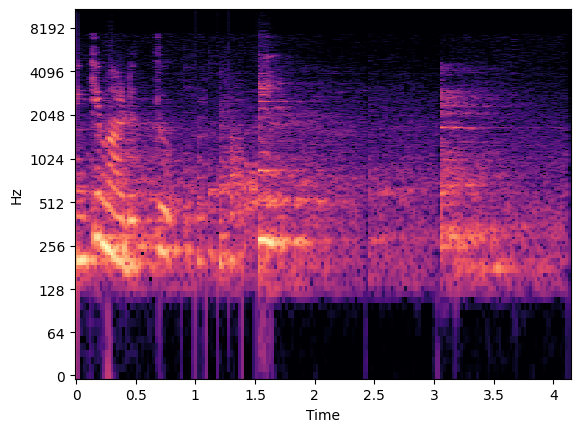

In [15]:

for folder in os.listdir(data_dir):
  i=0
  for fil in os.listdir(os.path.join(data_dir,folder)):
    dir=os.path.join(data_dir,folder,fil)
    with soundfile.SoundFile(dir) as audio:
      y,sr= librosa.load(audio, mono=True,dtype="float32")
      #librosa.display.waveshow(y,sr=sr)
      #plt.show()
      stft_spectrum_matrix = librosa.stft(y)
      librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
      plt.savefig(os.path.join(out_dir,folder,'spec{:04}.jpg'.format(i)))
      print(i)
      i+=1





In [16]:
from google.colab import files
import os

dir_to_zip = 'speech_waveforms' #@param {type: "string"}
output_filename = 'file.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )







<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>